# Basic Example

As a simple example to show how to use this package, we will use the four-stream example from *Pinch Analysis and Process Integration: A User Guide On Process Integration for the Efficient Use of Energy, Second edition, Ian C. Kemp, p. 4*:

Stream number and type | Heat flow (kW) | Supply Temperature \[°C\] | Target Temperature \[°C\]
:--- | --- | --- | ---
1. Cold | -230 | 20 | 135
2. Hot | 330 | 170 | 60
3. Cold | -240 | 80 | 140
4. Hot | 180 | 150 | 30
$\Delta T_{\mathrm{min}} = 10 \mathrm{K}$

## Creating streams
The following code creates the streams:

In [1]:
from pina import make_stream

# Arguments: heat flow, supply temperature, target temperature
cold_1 = make_stream(-230, 20, 135)
hot_1 = make_stream(330, 170, 60)
cold_2 = make_stream(-240, 80, 140)
hot_2 = make_stream(180, 150, 30)
min_temp_diff = 10

The most common convention which is also used in this package is that cold streams have negative heat flow and hot streams have positive heat flow.  
The units are not explicitly stated here. You can use any units you like as long as they are consistent.  

## Performing a Pinch Analysis

We then use the `PinchAnalyzer` class to perform a pinch analysis. It requires one argument, the temperature shift. The temperature shift will be added to all cold streams and subtracted from all hot streams. It is equal to $\Delta T_{\mathrm{min}} / 2$. (Note: It can also be set for individual streams. For example, to set it to 15 K for a single stream, use `make_stream(-230, 20, 135, 15)`.)

In [2]:
from pina import PinchAnalyzer

temp_shift = min_temp_diff / 2
analyzer = PinchAnalyzer(temp_shift)
analyzer.add_streams(cold_1, hot_1, cold_2, hot_2)

### Results

The pinch analyzer calculates the energy targets, the pinch temperature(s) and the coordinates of the composite curves. We can simply query the results, for example:

In [3]:
analyzer.heating_demand

470.0

In [4]:
# Note that a list is returned because multiple pinches are possible.
analyzer.pinch_temps

[85.0]

In [5]:
# Returns a tuple of 2 lists:
# - The first list contains heat flows
# - The second list contains the corresponding temperatures
analyzer.cold_composite_curve

([60.0, 180.0, 510.0, 530.0], [20, 80, 135, 140])

The following properties may be requested:
* `heating_demand`
* `cooling_demand`
* `hot_utility_target`
* `cold_utility_target`
* `heat_recovery_target`
* `pinch_temps`
* `cold_composite_curve`
* `hot_composite_curve`
* `shifted_cold_composite_curve`
* `shifted_hot_composite_curve`
* `grand_composite_curve`

For example, the following code obtains the data from the pinch analyzer and prints it.

In [6]:
print(
    "Heating demand: {}\n"
    "Cooling demand: {}\n"
    "Hot utility target: {}\n"
    "Cold utility target: {}\n"
    "Heat recovery target: {}\n"
    "Pinch temperature(s): {}"
    .format(
        analyzer.heating_demand,
        analyzer.cooling_demand,
        analyzer.hot_utility_target,
        analyzer.cold_utility_target,
        analyzer.heat_recovery_target,
        analyzer.pinch_temps))

Heating demand: 470.0
Cooling demand: 510.0
Hot utility target: 20.0
Cold utility target: 60.0
Heat recovery target: 450.0
Pinch temperature(s): [85.0]


## Plotting composite curves

This package does not include any plotting functionality, so we need a data visualization library for this. Here is an example that uses matplotlib to plot the hot and cold composite curves in one subplot and the grand composite curve in another subplot:

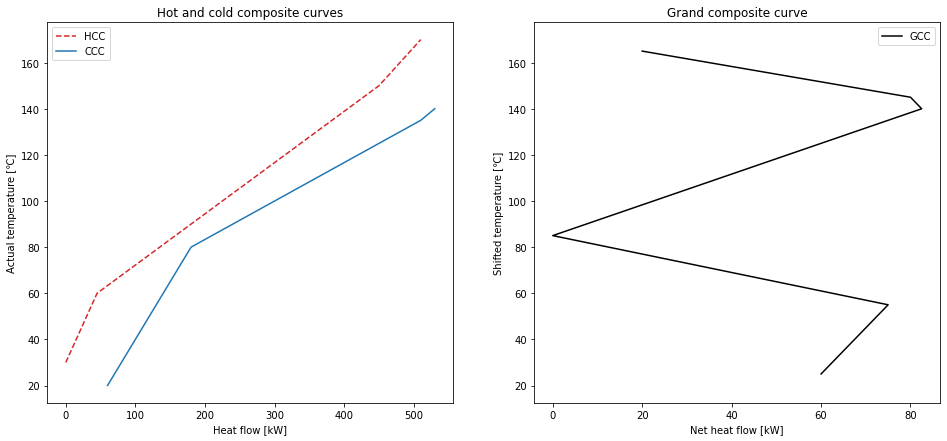

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].plot(*analyzer.hot_composite_curve, color="tab:red", linestyle="--", label="HCC")
ax[0].plot(*analyzer.cold_composite_curve, color="tab:blue", linestyle="-", label="CCC")
ax[0].legend()
ax[0].set_title("Hot and cold composite curves")
ax[0].set_xlabel("Heat flow [kW]")
ax[0].set_ylabel("Actual temperature [\u2103]")

ax[1].plot(*analyzer.grand_composite_curve, color="k", linestyle="-", label="GCC")
ax[1].legend()
ax[1].set_title("Grand composite curve")
ax[1].set_xlabel("Net heat flow [kW]")
ax[1].set_ylabel("Shifted temperature [\u2103]")

# Make the y-axis equal in both plots
ylims = (*ax[0].get_ylim(), *ax[1].get_ylim())
minmax_ylims = (min(ylims), max(ylims))
ax[0].set_ylim(minmax_ylims)
ax[1].set_ylim(minmax_ylims)

plt.show()

# More examples
For some more complex examples, check out the `examples` folder. They show some additional features:
* Streams carrying latent heat (e.g. evaporation and condensation)
* Streams consisting of multiple segments
* Streams with individual temperature shifts